In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys

#경고창이 뜨지 않도록 해주는 것
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

In [2]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('NYC_taxi_extra_info.csv')

In [5]:
df['weekday_sin']=np.sin(2*np.pi*df.weekday/7)
df['weekday_cos']=np.cos(2*np.pi*df.weekday/7)
df['hour_sin']=np.sin(2*np.pi*df.hour/24)
df['hour_cos']=np.cos(2*np.pi*df.hour/24)

In [6]:
df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])
df['zip_code'] = df['zip_code'].astype(str) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   zip_code          87020 non-null  object        
 1   pickup_hour       87020 non-null  datetime64[ns]
 2   month             87020 non-null  int64         
 3   day               87020 non-null  int64         
 4   weekday           87020 non-null  int64         
 5   hour              87020 non-null  int64         
 6   is_weekend        87020 non-null  int64         
 7   cnt               87020 non-null  int64         
 8   lat               87020 non-null  float64       
 9   lon               87020 non-null  float64       
 10  temp              87020 non-null  float64       
 11  humid             87020 non-null  float64       
 12  pressure          87020 non-null  float64       
 13  wind_direction    87020 non-null  float64       
 14  wind_speed        8702

In [8]:
df.columns

Index(['zip_code', 'pickup_hour', 'month', 'day', 'weekday', 'hour',
       'is_weekend', 'cnt', 'lat', 'lon', 'temp', 'humid', 'pressure',
       'wind_direction', 'wind_speed', 'des', 'wind_x', 'wind_y', 'is_raining',
       'is_snowing', 'is_cloudy', 'is_clear', 'weather_strength',
       'weekday_sin', 'weekday_cos', 'hour_sin', 'hour_cos'],
      dtype='object')

In [16]:
x=df[[ 'lat', 'lon', 'temp','weather_strength','weekday_sin', 'weekday_cos', 'hour_sin', 'hour_cos', 'is_weekend' ]]
y=df['cnt']

#[ 'weekday_sin', 'weekday_cos', 'hour_sin', 'hour_cos', 'is_weekend', 'lat', 'lon', 'temp', 'is_raining', 'is_snowing', 'is_cloudy', 'is_clear', 'weather_strength']

In [17]:
x

,lat,lon,temp,weather_strength,weekday_sin,weekday_cos,hour_sin,hour_cos,is_weekend
0,40.761229,-73.929593,-5.100000,0,0.433884,-0.900969,0.000000,1.000000,1
1,40.708312,-74.013440,-5.100000,0,0.433884,-0.900969,0.000000,1.000000,1
2,40.692500,-73.991763,-5.100000,0,0.433884,-0.900969,0.000000,1.000000,1
3,40.653199,-73.784133,-5.100000,0,0.433884,-0.900969,0.000000,1.000000,1
4,40.837391,-73.941015,-5.100000,0,0.433884,-0.900969,0.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...
87015,40.632650,-73.996601,-6.175519,0,-0.974928,-0.222521,-0.258819,0.965926,1
87016,40.829743,-73.908570,-6.175519,0,-0.974928,-0.222521,-0.258819,0.965926,1
87017,40.750423,-73.819936,-6.175519,0,-0.974928,-0.222521,-0.258819,0.965926,1
87018,40.627427,-73.945651,-6.175519,0,-0.974928,-0.222521,-0.258819,0.965926,1


In [9]:
scaler=RobustScaler()

In [43]:
col=['lat','lon','temp']
scaled=scaler.fit_transform(x[col])

In [44]:
scaled_df=pd.DataFrame(scaled,columns=col,index=x.index)
scaled_df

,lat,lon,temp
0,0.170778,0.473990,0.033156
1,-0.743696,-0.845379,0.033156
2,-1.016948,-0.504282,0.033156
3,-1.696114,2.762858,0.033156
4,1.486952,0.294261,0.033156
...,...,...,...
39995,-1.250649,0.620214,-0.091796
39996,0.703364,0.240325,-0.091796
39997,-0.488576,-0.781161,-0.091796
39998,1.020141,0.147305,-0.091796


In [45]:
before_merge=x.drop(col,axis=1)
before_merge

,weekday_sin,weekday_cos,hour_sin,hour_cos,is_weekend,is_raining,is_snowing,is_cloudy,is_clear,weather_strength
0,0.433884,-0.900969,0.000000,1.000000,1,0,0,0,1,0
1,0.433884,-0.900969,0.000000,1.000000,1,0,0,0,1,0
2,0.433884,-0.900969,0.000000,1.000000,1,0,0,0,1,0
3,0.433884,-0.900969,0.000000,1.000000,1,0,0,0,1,0
4,0.433884,-0.900969,0.000000,1.000000,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
39995,0.433884,-0.900969,0.707107,0.707107,0,0,0,1,0,3
39996,0.433884,-0.900969,0.707107,0.707107,0,0,0,1,0,3
39997,0.433884,-0.900969,0.707107,0.707107,0,0,0,1,0,3
39998,0.433884,-0.900969,0.707107,0.707107,0,0,0,1,0,3


In [46]:
scaled_x=pd.concat([scaled_df,before_merge],axis=1)

In [47]:
scaled_x

,lat,lon,temp,weekday_sin,weekday_cos,hour_sin,hour_cos,is_weekend,is_raining,is_snowing,is_cloudy,is_clear,weather_strength
0,0.170778,0.473990,0.033156,0.433884,-0.900969,0.000000,1.000000,1,0,0,0,1,0
1,-0.743696,-0.845379,0.033156,0.433884,-0.900969,0.000000,1.000000,1,0,0,0,1,0
2,-1.016948,-0.504282,0.033156,0.433884,-0.900969,0.000000,1.000000,1,0,0,0,1,0
3,-1.696114,2.762858,0.033156,0.433884,-0.900969,0.000000,1.000000,1,0,0,0,1,0
4,1.486952,0.294261,0.033156,0.433884,-0.900969,0.000000,1.000000,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-1.250649,0.620214,-0.091796,0.433884,-0.900969,0.707107,0.707107,0,0,0,1,0,3
39996,0.703364,0.240325,-0.091796,0.433884,-0.900969,0.707107,0.707107,0,0,0,1,0,3
39997,-0.488576,-0.781161,-0.091796,0.433884,-0.900969,0.707107,0.707107,0,0,0,1,0,3
39998,1.020141,0.147305,-0.091796,0.433884,-0.900969,0.707107,0.707107,0,0,0,1,0,3


In [18]:
y

0         75
1         64
2        169
3        222
4         64
        ... 
39995      1
39996     29
39997     66
39998      8
39999      7
Name: cnt, Length: 40000, dtype: int64

In [11]:
model=RandomForestRegressor()

In [ ]:
#1 criterion='mae'

In [20]:
score=cross_val_score(model,x,y,scoring="neg_mean_absolute_error",cv=5)
print("score: {}".format(score))
print("avarage: "+str(sum(score)/len(score)))

score: [-48.26142375 -26.512155   -25.45044    -38.3025275  -25.24238563]
avarage: -32.753786375


In [ ]:
#2 default

In [22]:
score=cross_val_score(model,x,y,scoring="neg_mean_absolute_error",cv=5)
print("score: {}".format(score))
print("avarage: "+str(sum(score)/len(score)))

score: [-48.77688625 -25.6580075  -24.68760125 -39.4430725  -25.0464325 ]
avarage: -32.7224


In [ ]:
#3 n_estimators=500

In [24]:
score=cross_val_score(model,x,y,scoring="neg_mean_absolute_error",cv=5)
print("score: {}".format(score))
print("avarage: "+str(sum(score)/len(score)))

score: [-48.37239625 -25.78112775 -24.52127575 -39.32889875 -24.82273575]
avarage: -32.56528684999999


In [25]:
n=[150,200,250,300,350]

for i in n:
    print("n_estimator: "+str(i))
    model=RandomForestRegressor(n_estimators=i)
    score=cross_val_score(model,x,y,scoring="neg_mean_absolute_error",cv=5)
    print("score: {}".format(score))
    print("avarage: "+str(sum(score)/len(score)))
    print()

n_estimator: 150
score: [-48.625425   -25.790895   -24.70642583 -39.4338075  -24.85579917]
avarage: -32.6824705

n_estimator: 200
score: [-48.37285375 -25.78803562 -24.69597313 -39.26385313 -24.85340125]
avarage: -32.594823375

n_estimator: 250
score: [-48.418994  -25.6647515 -24.5347315 -39.548864  -24.8191045]
avarage: -32.5972891

n_estimator: 300
score: [-48.55734958 -25.70459125 -24.456275   -39.59629458 -24.82029125]
avarage: -32.62696033333334

n_estimator: 350
score: [-48.19552821 -25.69012143 -24.43868464 -39.39129857 -24.78901714]
avarage: -32.50093



In [26]:
n=[400,450,500,550,600]

for i in n:
    print("n_estimator: "+str(i))
    model=RandomForestRegressor(n_estimators=i)
    score=cross_val_score(model,x,y,scoring="neg_mean_absolute_error",cv=5)
    print("score: {}".format(score))
    print("avarage: "+str(sum(score)/len(score)))
    print()

n_estimator: 400
score: [-48.28726906 -25.68699219 -24.43373844 -39.49565844 -24.90782875]
avarage: -32.562297375

n_estimator: 450
score: [-48.52192139 -25.67299528 -24.43458389 -39.48175917 -24.78075   ]
avarage: -32.578401944444444

n_estimator: 500
score: [-48.35467975 -25.640084   -24.532578   -39.347197   -24.8324675 ]
avarage: -32.54140125

n_estimator: 550
score: [-48.24998614 -25.64637523 -24.56426477 -39.46383    -24.84664659]
avarage: -32.55422054545455

n_estimator: 600
score: [-48.34245958 -25.67842146 -24.38183875 -39.43242729 -24.75021625]
avarage: -32.517072666666664



In [33]:
#StandardScaler

model=RandomForestRegressor(n_estimators=350)
score=cross_val_score(model,scaled_x,y,scoring="neg_mean_absolute_error",cv=5)
print("score: {}".format(score))
print("avarage: "+str(sum(score)/len(score)))

score: [-48.33825179 -25.83076071 -24.54409857 -39.3375     -24.89620107]
avarage: -32.589362428571434


In [40]:
#MinMaxScaler

model=RandomForestRegressor(n_estimators=350)
score=cross_val_score(model,scaled_x,y,scoring="neg_mean_absolute_error",cv=5)
print("score: {}".format(score))
print("avarage: "+str(sum(score)/len(score)))

score: [-48.59911821 -25.74098786 -24.47471107 -39.33827714 -24.76015357]
avarage: -32.582649571428576


In [48]:
#RobustScaler

model=RandomForestRegressor(n_estimators=350)
score=cross_val_score(model,scaled_x,y,scoring="neg_mean_absolute_error",cv=5)
print("score: {}".format(score))
print("avarage: "+str(sum(score)/len(score)))

score: [-48.30340821 -25.81574143 -24.41079643 -39.56063179 -24.7709575 ]
avarage: -32.57230707142857


In [11]:
model=RandomForestRegressor(n_estimators=350)
score=cross_val_score(model,x,y,scoring="neg_mean_absolute_error",cv=5)
print("score: {}".format(score))
print("avarage: "+str(sum(score)/len(score)))

score: [-43.80351282 -21.6134204  -26.83926798 -24.17417687 -39.55646436]
avarage: -31.197368486718982


lat 0.4738222962359814
lon 0.26195486246656513
hour_sin 0.08791404429427067
hour_cos 0.07908202174076277
temp 0.026928321198715084
is_weekend 0.020955011696874148
weekday_sin 0.020811214536961022
weekday_cos 0.017728654543815257
weather_strength 0.007609016411718478
is_cloudy 0.001045742979383887
is_snowing 0.000915045267379466
is_clear 0.0008299139290679616
is_raining 0.0004038546985046732


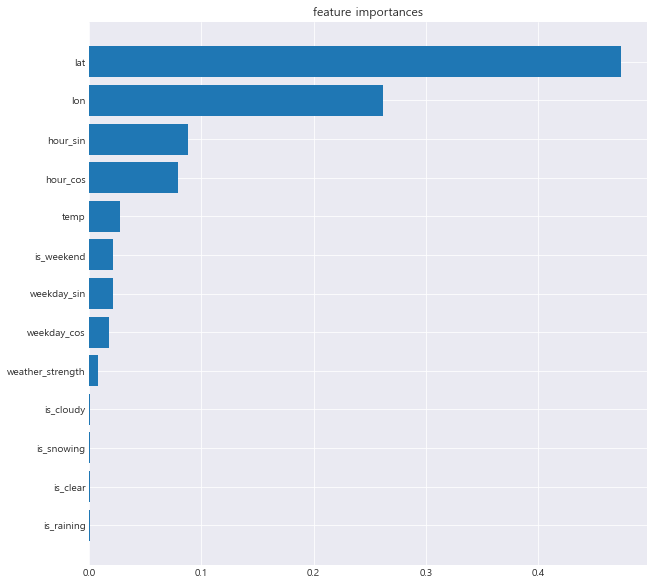

In [15]:
model.fit(x,y)
importances=model.feature_importances_
indices=np.argsort(importances)[::-1]

for f in range(x.shape[1]):
    print(x.columns[indices][f],importances[indices[f]])

sorted_idx=model.feature_importances_.argsort()
    
plt.figure(figsize=(10,10))
plt.title("feature importances")
plt.barh(x.columns[sorted_idx],model.feature_importances_[sorted_idx])
plt.show()

In [10]:
#정훈님 모델 파라미터
model=RandomForestRegressor(bootstrap=True,ccp_alpha=0.0,criterion='mse',max_depth=None,max_features='auto',max_leaf_nodes=None,max_samples=None,min_impurity_decrease=0.0,min_impurity_split=None,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=100,n_jobs=-1,oob_score=False,random_state=0,verbose=0,warm_start=False)
score=cross_val_score(model,x,y,scoring="neg_mean_absolute_error",cv=5)
print("score: {}".format(score))
print("avarage: "+str(sum(score)/len(score)))

score: [-43.76660595 -21.55088256 -26.84278097 -24.17176626 -39.5569461 ]
avarage: -31.17779636865089


In [12]:
#제일 영향없는 변수 4개 제거('is_raining', 'is_snowing', 'is_cloudy', 'is_clear')
model=RandomForestRegressor(bootstrap=True,ccp_alpha=0.0,criterion='mse',max_depth=None,max_features='auto',max_leaf_nodes=None,max_samples=None,min_impurity_decrease=0.0,min_impurity_split=None,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=100,n_jobs=-1,oob_score=False,random_state=0,verbose=0,warm_start=False)
score=cross_val_score(model,x,y,scoring="neg_mean_absolute_error",cv=5)
print("score: {}".format(score))
print("avarage: "+str(sum(score)/len(score)))

score: [-43.88155137 -21.48376695 -26.92520283 -23.65518099 -39.6028459 ]
avarage: -31.109709606986893


In [14]:
#'weather strength'까지 제거
model=RandomForestRegressor(bootstrap=True,ccp_alpha=0.0,criterion='mse',max_depth=None,max_features='auto',max_leaf_nodes=None,max_samples=None,min_impurity_decrease=0.0,min_impurity_split=None,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=100,n_jobs=-1,oob_score=False,random_state=0,verbose=0,warm_start=False)
score=cross_val_score(model,x,y,scoring="neg_mean_absolute_error",cv=5)
print("score: {}".format(score))
print("avarage: "+str(sum(score)/len(score)))

score: [-42.76573316 -18.87053838 -31.14256895 -25.46478511 -40.22055964]
avarage: -31.692837048954267


In [18]:
#정훈님, 제일 영향없는 변수 4개 빼고
model=RandomForestRegressor(bootstrap=True,ccp_alpha=0.0,criterion='mse',max_depth=None,max_features='auto',max_leaf_nodes=None,max_samples=None,min_impurity_decrease=0.0,min_impurity_split=None,min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=350,n_jobs=-1,oob_score=False,random_state=0,verbose=0,warm_start=False)
score=cross_val_score(model,x,y,scoring="neg_mean_absolute_error",cv=5)
print("score: {}".format(score))
print("avarage: "+str(sum(score)/len(score)))

score: [-43.82967626 -21.27896264 -26.78961684 -23.54392077 -39.53874594]
avarage: -30.9961844896083


In [21]:
#GridSearch
params={
    'n_estimators':[200,300],
    'min_samples_split':[2,3],
    'min_samples_leaf':[1,2]
}
model=RandomForestRegressor()
grid=GridSearchCV(model,param_grid=params,cv=5,refit=True,scoring='neg_mean_absolute_error')
grid.fit(x,y)
print('best parameters: ',grid.best_params_)
print('best score: ',grid.best_score_)

best parameters:  {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 300}
best score:  -30.903577039131164


In [22]:
#GridSearch
params={
    'n_estimators':[300,400,500],
    'min_samples_split':[3,4],
    'min_samples_leaf':[2,3]
}
model=RandomForestRegressor()
grid=GridSearchCV(model,param_grid=params,cv=5,refit=True,scoring='neg_mean_absolute_error')
grid.fit(x,y)
print('best parameters: ',grid.best_params_)
print('best score: ',grid.best_score_)

best parameters:  {'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 300}
best score:  -30.878245245649488


In [23]:
#GridSearch
params={
    'n_estimators':[300],
    'min_samples_split':[4,5,6],
    'min_samples_leaf':[2]
}
model=RandomForestRegressor()
grid=GridSearchCV(model,param_grid=params,cv=5,refit=True,scoring='neg_mean_absolute_error')
grid.fit(x,y)
print('best parameters: ',grid.best_params_)
print('best score: ',grid.best_score_)

best parameters:  {'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 300}
best score:  -30.922847035283063


### 그리드서치 결과 RandomForestRegressor()의 n_estimators=300, min_samples_leaf=2, min_samples_split=4일 때 최소 MAE 30.88이 나왔음